In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0305.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0394.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0105.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0104.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0325.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0332.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0296.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0114.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0329.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0100.jpg
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0299.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0307.JPG
/kaggle/input/rice-leaf-diseases/rice_leaf_diseases/Brown spot/DSC_0301.JPG
/kaggle/inpu

Epoch 1/20, Loss: 1.0824, Accuracy: 40.00%
Epoch 2/20, Loss: 1.0297, Accuracy: 47.50%
Epoch 3/20, Loss: 0.9181, Accuracy: 58.33%
Epoch 4/20, Loss: 0.8917, Accuracy: 60.83%
Epoch 5/20, Loss: 0.7759, Accuracy: 70.83%
Epoch 6/20, Loss: 0.6833, Accuracy: 71.67%
Epoch 7/20, Loss: 0.5143, Accuracy: 74.17%
Epoch 8/20, Loss: 0.4859, Accuracy: 81.67%
Epoch 9/20, Loss: 0.4596, Accuracy: 79.17%
Epoch 10/20, Loss: 0.2947, Accuracy: 87.50%
Epoch 11/20, Loss: 0.3180, Accuracy: 86.67%
Epoch 12/20, Loss: 0.2733, Accuracy: 86.67%
Epoch 13/20, Loss: 0.3080, Accuracy: 85.83%
Epoch 14/20, Loss: 0.2182, Accuracy: 90.83%
Epoch 15/20, Loss: 0.2354, Accuracy: 90.00%
Epoch 16/20, Loss: 0.1639, Accuracy: 95.00%
Epoch 17/20, Loss: 0.1807, Accuracy: 92.50%
Epoch 18/20, Loss: 0.1278, Accuracy: 95.00%
Epoch 19/20, Loss: 0.1161, Accuracy: 95.83%
Epoch 20/20, Loss: 0.1029, Accuracy: 96.67%


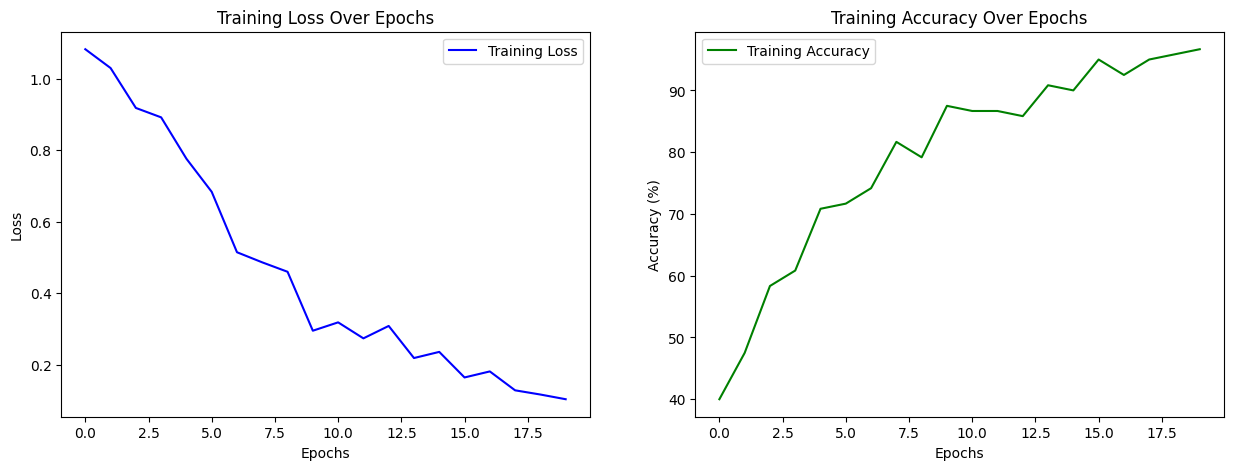

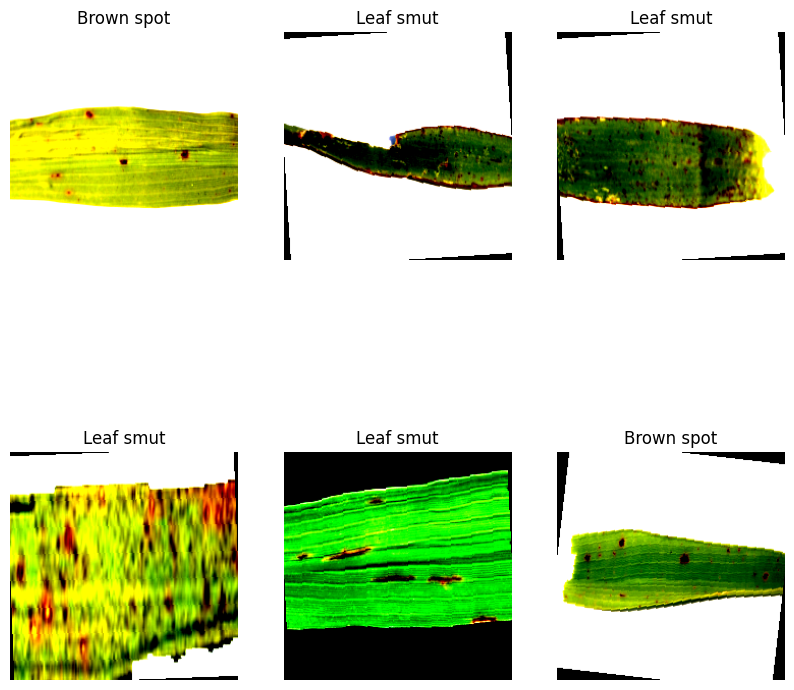

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Step 1: Define the model (AlexNet from scratch)
class CustomAlexNet(nn.Module):
    def __init__(self, num_classes=3):  # Fixed the __init__ method
        super(CustomAlexNet, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Step 2: Load and transform the dataset with augmentations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(
    root='/kaggle/input/rice-leaf-diseases/rice_leaf_diseases',
    transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Step 3: Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomAlexNet(num_classes=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Step 4: Prepare for training
num_epochs = 20
train_loss_values = []
train_accuracy_values = []

# Step 5: Training the model with loss plot
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data).item()
        total_samples += labels.size(0)

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = running_corrects / total_samples * 100
    train_loss_values.append(avg_loss)
    train_accuracy_values.append(avg_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%")

# Step 6: Plotting training loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(train_loss_values, label="Training Loss", color="blue")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training Loss Over Epochs")
ax1.legend()
ax2.plot(train_accuracy_values, label="Training Accuracy", color="green")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy (%)")
ax2.set_title("Training Accuracy Over Epochs")
ax2.legend()
plt.show()

# Step 7: Plotting sample images
data_iter = iter(train_loader)
images, labels = next(data_iter)
plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    ax.set_title(train_data.classes[labels[i]])
    ax.axis('off')
plt.show()

In [3]:
# Save the trained model
torch.save(model.state_dict(), 'custom_alexnet_model.pth')
print("Model saved successfully!")

Model saved successfully!


<ipython-input-4-7369ba773c4c>:100: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/custom_alexnet_model.pth'))


Test Accuracy: 100.00%


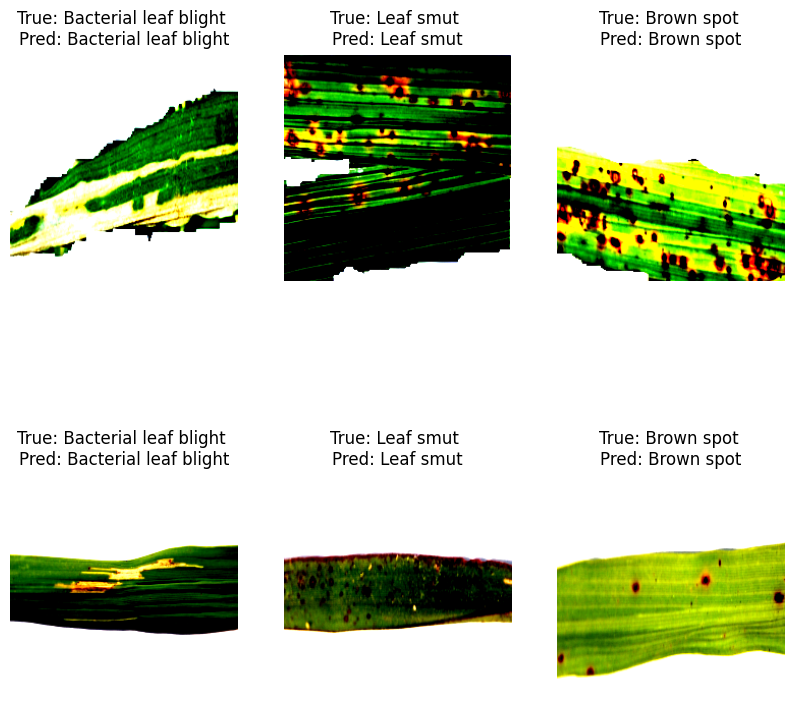

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define the transformations (same as for training and validation)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the dataset (same folder structure with subfolders: 'dog', 'cat', 'fox')
dataset = datasets.ImageFolder(root='/kaggle/input/rice-leaf-diseases/rice_leaf_diseases', transform=transform)

# Split the dataset into 80% training and 20% testing
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing
train_data, test_data = random_split(dataset, [train_size, test_size])

# DataLoader for the test dataset
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define the model (AlexNet from scratch)
class CustomAlexNet(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomAlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


# Define the function to test the model on test data
def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    running_corrects = 0
    total_samples = 0
    predictions = []
    true_labels = []

    with torch.no_grad():  # No need to compute gradients during testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            running_corrects += torch.sum(preds == labels.data).item()
            total_samples += labels.size(0)

            # Store predictions and true labels for sample display
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = running_corrects / total_samples * 100  # Calculate accuracy as percentage
    return accuracy, predictions, true_labels


# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomAlexNet(num_classes=3).to(device)
model.load_state_dict(torch.load('/kaggle/working/custom_alexnet_model.pth'))
model.eval()  # Ensure the model is in evaluation mode

# Test the model
test_accuracy, predictions, true_labels = test_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Display some sample test images, predicted and true labels
classes = dataset.classes  # e.g., ['cat', 'dog', 'fox']
sample_indices = np.random.choice(len(test_loader.dataset), size=6, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    img, label = test_loader.dataset[idx]  # Get sample image and label
    pred = predictions[idx]  # Get the predicted label

    plt.subplot(2, 3, i + 1)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # Convert tensor to numpy for plotting
    plt.title(f"True: {classes[label]} \nPred: {classes[pred]}")
    plt.axis('off')

plt.show()
